In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/mushroom_cleaned.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
data.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [ ]:
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 97.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7349
           1       0.98      0.98      0.98      8862

    accuracy                           0.98     16211
   macro avg       0.98      0.98      0.98     16211
weighted avg       0.98      0.98      0.98     16211

Confusion Matrix:
[[7149  200]
 [ 178 8684]]


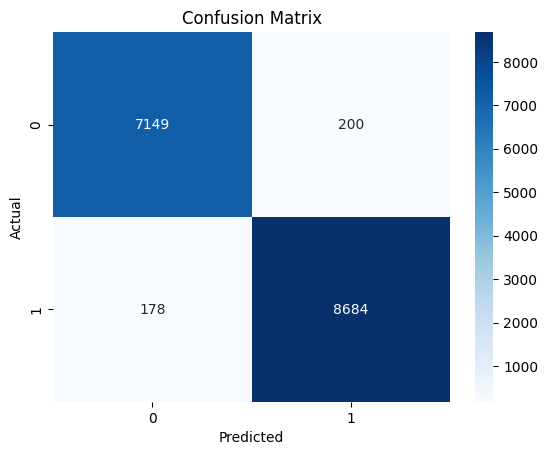

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

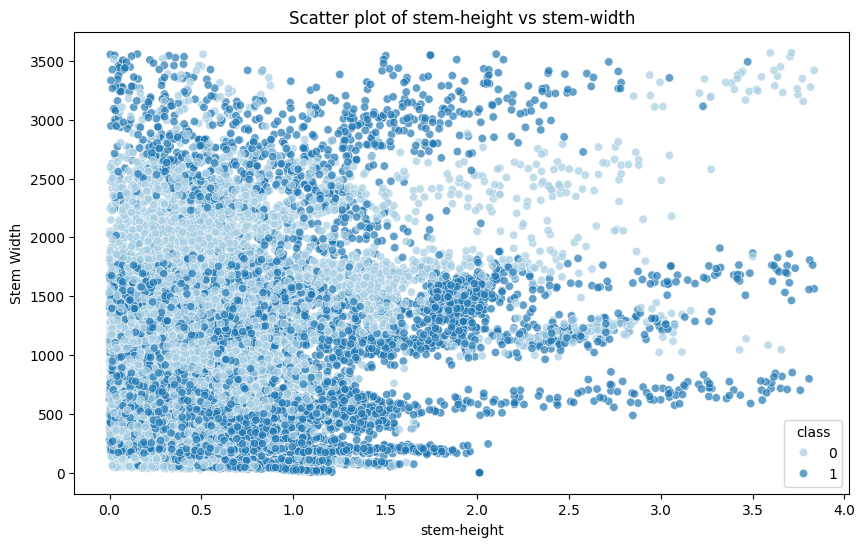

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['stem-height'], y=X_test['stem-width'], hue=y_test, palette='Paired', alpha=0.7)
plt.title('Scatter plot of stem-height vs stem-width')
plt.xlabel('stem-height')
plt.ylabel('Stem Width')
plt.show()


In [ ]:
def predict_instance():
    print("Please enter the following details for the mushroom instance:")
    user_input = {}

    user_input['cap-diameter'] = float(input("Enter the cap diameter (in cm): "))
    user_input['cap-shape'] = int(input("Enter the cap shape (1 for bell, 2 for conical, 3 for convex, 4 for flat, 5 for knobbed, 6 for sunken): "))
    user_input['gill-attachment'] = int(input("Enter the gill attachment (1 for attached, 2 for descending, 3 for free, 4 for notched): "))
    user_input['gill-color'] = int(input("Enter the gill color (1 for black, 2 for brown, 3 for buff, 4 for chocolate, 5 for gray, 6 for green, 7 for orange, 8 for pink, 9 for purple, 10 for red, 11 for white, 12 for yellow): "))
    user_input['stem-height'] = float(input("Enter the stem height (in cm): "))
    user_input['stem-width'] = float(input("Enter the stem width (in cm): "))
    user_input['stem-color'] = int(input("Enter the stem color (1 for brown, 2 for buff, 3 for cinnamon, 4 for gray, 5 for orange, 6 for pink, 7 for red, 8 for white, 9 for yellow): "))
    user_input['season'] = int(input("Enter the season (1 for spring, 2 for summer, 3 for autumn, 4 for winter): "))

    user_input_df = pd.DataFrame([user_input])
    prediction = clf.predict(user_input_df)

    if prediction[0] == 1:
        print("The mushroom instance is predicted to be poisonous.")
    else:
        print("The mushroom instance is predicted to be edible.")

predict_instance()

Please enter the following details for the mushroom instance:
Enter the cap diameter (in cm): 4
Enter the cap shape (1 for bell, 2 for conical, 3 for convex, 4 for flat, 5 for knobbed, 6 for sunken): 1
Enter the gill attachment (1 for attached, 2 for descending, 3 for free, 4 for notched): 4
Enter the gill color (1 for black, 2 for brown, 3 for buff, 4 for chocolate, 5 for gray, 6 for green, 7 for orange, 8 for pink, 9 for purple, 10 for red, 11 for white, 12 for yellow): 5
Enter the stem height (in cm): 6
Enter the stem width (in cm): 3
Enter the stem color (1 for brown, 2 for buff, 3 for cinnamon, 4 for gray, 5 for orange, 6 for pink, 7 for red, 8 for white, 9 for yellow): 5
Enter the season (1 for spring, 2 for summer, 3 for autumn, 4 for winter): 4
The mushroom instance is predicted to be poisonous.
